# Midterm - DS2000B and IS2002B

## Student ID: 251255363 (XX / 100)

## General comments

This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the first six Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to documents that are shared - i.e. on google docs or dropbox - or communicate in any other way with anyone (real or AI-agent such as chatGPT) inside or outside the class during the midterm.** To finish the midterm in the alloted 1hr and 50min, you will have to work efficiently. **Read the entirety of each question carefully.** 

You need to submit the midterm by the due date (12:20) on OWL under Assignments/Midterm. Late submission will be scored with 0 pts, unless you have received extra accommadation. So please start your submission five minutes before the deadline!  

### Additional Guidance

The midterm is supposed to be challenging. If you get stuck on a particular question because you can't solve a programming problem, just write down in text *how* you would try to solve the problem - if correct this can give you partial points. Then continue the other parts of the question, the next question, or next task. The midterm is designed, such that the solutions do not require that the previous question is solved correctly. 
If you need the solution from a previous problem, just *assume* some outcome and answer the question under that assumption. If you do this, make your assumptions explicit. 

Read all the questions carefully. Each questions demands a written answer as part of it. These need to be spelled out in a whole English sentence. 

In [3]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, and seaborn. 

### You are not allowed to rely on any other packages or modules.  

import matplotlib
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np
import seaborn as sb
import scipy.stats as ss

## Data set
Transcranial direct current stimulation (tDCS) is a form of electrical brain stimulation. It send a weak electric current through the brain. tDCS is thought to increase brain plasticity if it is applied during behavioral training  

In 2012, our lab conducted a study looking at the causal effect of tDCS during motor sequence learning. Participant where a ad-hoc sample from the undergraduate population at UCL (University College London). Participants had to type out sequences of 5 numbers as fast as possible on a keyboard. First, they were tested before training (pre-test). We recorded both average movement time (MT), i.e. how many seconds they required to complete the 5 key presses, and the proportion of trials with an error (Error). To reduce the differences in preexisting performance, we decided to admit only participants that could do the task at pretest reasonably well (Movement time < 3.6s) to the main study. This led to the exclusion of 15 participants (not in the dataset).

Half of these participants were randomly assigned to a experimental group, and the other half to the control group. We decided to block for gender in this experiment, but no other variable. All participants trained the task for 4 consecutive days for 60min each with the left hand. During training, we attached two electrodes to their head. For the experimental group a current was sent between electrodes. The control group received only a brief stimulation, so they also experienced the initial tingle on the scalp, but after that the current was switched off. When interviewed afterwards, participants were not better at chance at guessing whether they were assigned to the tDCS or Control group.  

The Data frame contains the following variables. 

1. SN - Subject Number 
2. age - Age of the Subject at time of testing in years 
3. gender - Gender of subject: 'F':female or 'M':male 
4. hand - performing hand 1=left 2=right (you have only left hand data here)
5. tDCS - 1 = Experimental group, 0 = control group  
5. Error_pre: Proportion of error trials at pre-test 
6. Error_post: Proportion of error trials at post-test
7. MT_pre: average Movement time at pre-test  
8. MT_post: average Movement time at post-test

**REFERENCE**: 
Waters-Metenier, S., Husain, M., Wiestler, T., & Diedrichsen, J. (2014) Bihemispheric tDCS enhances effector-independent representations of motor synergy and sequence learning. Journal of Neuroscience.

All details required to answer this midterm are given in this Jupyter notebook - no information from the (more complex) original study is required. 


**WARNING**: While this is a real result and has been replicated a number of times, other studies have found smaller or no effect of tDCS on motor learning. Therefore the overall efficacy of this treatment is still a matter of debate. Also, tDCS is only safe when applied with medically approved equipment and by trained personnel - so please do not try this at home.    

## Task 1: Descriptors  

### Question 1.1 (5 pts)
Load the data file `tDCS_study_data.csv`. Find the participant with the slowest movement time at pre-test (MT_pre) and print out the corresponding row of the data frame),

*Written answer*: report their MT_pre, their age, and gender (in a full English sentence)

In [4]:
# Load the data file
df = pd.read_csv('tDCS_study_data.csv')

# Find the participant with the slowest movement time at pre-test
slowest_participant = df.loc[df['MT_pre'].idxmax()]

# Print out the corresponding row of the data frame
print(slowest_participant)


SN                 10
age                23
gender              M
hand                1
tDCS                1
Error_pre     0.03125
Error_post    0.09375
MT_pre          3.582
MT_post       0.86422
Name: 7, dtype: object


"The participant with the slowest movement time at pre-test had an MT_pre of 3.582 ms, was 23 years old, and identified as male."

### Question 1.2 (7 pts)
Print a table that shows the number of males and females participants assigned to the Experimental (tDCS) and Control group respectively. (3pts)

*Written answer*: What is the cause of this particular distribution of males / females across the two groups? (4pts)

*Hint*: see description of dataset for possible clues

In [5]:
# Create a pivot table to show the count of male and female participants in each group
table = pd.pivot_table(df, values='tDCS', columns='gender', aggfunc=len)

# Print the table
print(table)


gender   F   M
tDCS    12  12


because we decided to block for gender in this experiment, but no other variable.

### Question 1.3 (7pts)
Plot a histogram of the pretest-MT using 9 bins

*Written answer*: How would describe the shape of the distribution? What may be the reason for this particular shape of the distribution?

*Hint*: see description of dataset for possible clues



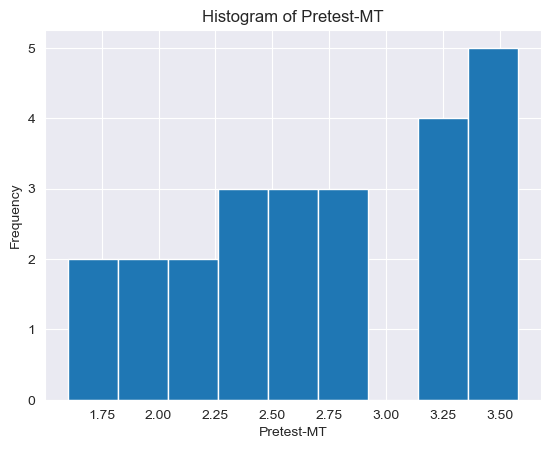

In [6]:
# Plot the histogram
plt.hist(df.MT_pre, bins=9)
plt.xlabel("Pretest-MT")
plt.ylabel("Frequency")
plt.title("Histogram of Pretest-MT")
plt.show()

Left-Skewed
Unimodal
Non-Symmetric
No outliers

### Question 1.4 (9pts)

Generate a boxplot of the pre-MT, with separate boxes for the experimental and control group. (2pts)

*Written answer*: Which group performed faster at pre-test? (2pts)

*Written answer*: Assume that the authors then used a randomization test to test for the effect of tDCS onto the post-test test performance. They found a significant group difference with p=0.01. 
Given the observed differences at pre-test, do you think you can still meaningfully interpret this p-value? That is, can the authors still reject the Null-hypothesis that tDCS has no influence on post-test performance? (5pts)

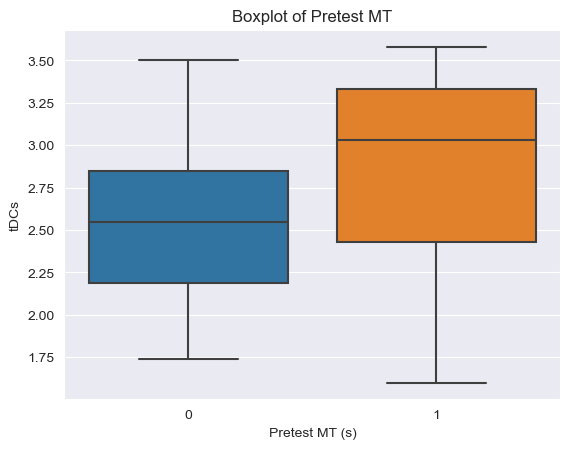

In [7]:
sb.boxplot(x=df['tDCS'],y=df['MT_pre'])
plt.xlabel('Pretest MT (s)')
plt.ylabel('tDCs')
plt.title('Boxplot of Pretest MT')
plt.show()

The observed differences at pre-test are important to consider in the interpretation of the p-value obtained from the randomization test. Pre-test differences can indicate that the groups were not equivalent at baseline, which can affect the interpretation of the post-test results.

If the observed pre-test differences were large enough to influence the post-test results, then the interpretation of the p-value could be affected. For example, if the pre-test differences were large and there was evidence of regression to the mean, then the effect of tDCS on post-test performance may not be as clear.

However, if the observed pre-test differences were small and there was no evidence of regression to the mean, then the p-value could still be meaningful in interpreting the effect of tDCS on post-test performance. In this case, the authors could reject the null hypothesis that tDCS has no influence on post-test performance based on the significant group difference observed in the randomization test.

Therefore, the interpretation of the p-value obtained from the randomization test would depend on the magnitude of the observed pre-test differences and other factors such as regression to the mean.

### Question 1.5 (6pts)

Generate a boxplot of the MT_post, with separate boxes for the experimental and control group. (2pts)

**Written answer**: Was the 25th percentile of MT_post for the control group smaller or larger than 75th percentile of MT_post for the experimental group? (4pts)

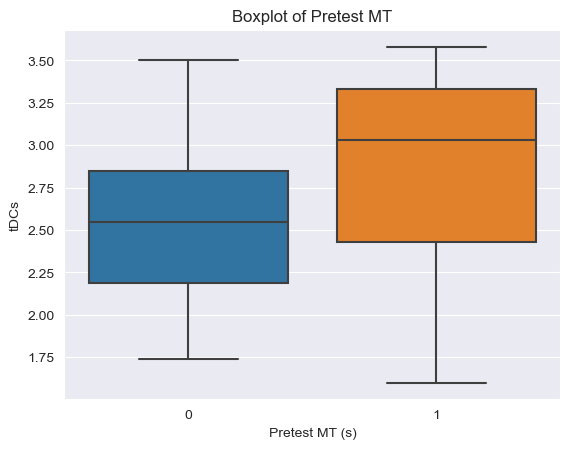

In [8]:
sb.boxplot(x=df['tDCS'],y=df['MT_pre'])
plt.xlabel('Pretest MT (s)')
plt.ylabel('tDCs')
plt.title('Boxplot of Pretest MT')
plt.show()

25th percentile of MT_post for the control group is smaller than 75th percentile of MT_post for the experimental group?

## Task 2: Randomization test and experimental inference
### Question 2.1 (8pts)
The authors want to test the hypothesis that the application of tDCS leads to a larger *change* from the pretest MT to post-test MT, as compared to a group that receives no tDCS. 
The authors want to generalize the results to the group that the sample was drawn from (young healthy college students), independent of their exact age and their pre-test performance.  

*Written answer*: Formulate the appropriate Null-hypothesis test. (3pts) 

Under this Null-hypothesis hypothesis, which variable is *exchangeable*? That is, which column in the data frame should you shuffle to build up a distribution under the Null hypothesis: 

 * Age 
 * MT_pre
 * MT_post
 * tDCS?

Justify why your chosen answer is correct, and why all other answers are incorrect. (5pts)



H0: tDCS has not effect on the change from pretestMT to posttest MT. The difference in MT (pre-post) is the same or smaller in the experimental as compared to the control group. (3pts)

Under the Null-hypothesis, tDCS (Experimental vs. Control) is exchangeable (because this was randomly assigned) and should be shuffled. Note that all other variables are not exchangeable as they were not randomly assigned.  (2pts for the right pick, 3pts for correct justification.)

### Question 2.2 (12pts)
Perform a randomization test to test the hypothesis that the application of tDCS causes the post-test MT to be *lower* in the Experimental as compared to the control group.
First, write a function that returns the mean difference in MT_post between the experimental and control group as your test statistics. 
Then use this function in a randomization test with at least 10000 iterations to build the expected  distribution of this statistics under the Null-hypothesis. 

*Written answer*: Report the observed mean difference, and the p-value for the case that you decided to reject the Null-hypothesis for the observed (or a more extreme) mean difference. Choose carefully between a one-sided and two-sided test. What is the correct interpretation of the p-value?    

*Note*: If you are using functions from a previous homework assignment, include all the necessary code in your answer. 

In [9]:
def mean_diff(data):
    grouped = data["MT_post"].groupby(data.tDCS).mean()
    mean_diff= grouped[0] - grouped[1]
    return mean_diff

In [10]:
# Create an array to store the mean differences
mean_diffs = np.zeros(10000)

# Get the observed mean difference
observed_mean_diff = mean_diff(df)

# Combine the MT_post data from both groups
combined_MT_post = np.concatenate([df[df['tDCS']=='0']['MT_post'].values, df[df['tDCS']=='1']['MT_post'].values])

# Get the number of subjects in the experimental group
n_experimental = len(df[df['tDCS']=='1'])

# Run the randomization test
for i in range(10000):
    # Randomly permute the combined_MT_post data
    permuted_MT_post = np.random.permutation(combined_MT_post)

    # Calculate the mean difference for the permuted data
    permuted_mean_diff = np.mean(permuted_MT_post[:n_experimental]) - np.mean(permuted_MT_post[n_experimental:])

    # Store the permuted mean difference in the mean_diffs array
    mean_diffs[i] = permuted_mean_diff

# Calculate the p-value
p_value = np.sum(mean_diffs <= observed_mean_diff) / 10000

print(f"Observed mean difference: {observed_mean_diff:.3f}")
print(f"P-value: {p_value:.4f}")


Observed mean difference: 0.465
P-value: 0.0000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Question 2.3 (10pts)
Now let's test the Hypothesis that the application of tDCS influences (increases or decreases) the proportion of errors that people make in the post-test. 

*Written answer*: Formulate the corresponding Null-hypothesis. (2pts)

Then write a function to return the difference in the proportion of errors between the two groups. (1pts)

*Written answer*: What Difference in error rate do you observe between the groups? Which group made more errors? (1pts)

Conduct conduct the appropriate randomization test to determine a p-value, if you had rejected the Null-hypothesis for the observed difference. (4pts)

*Written answer*: What is your conclusion about the above Hypothesis? (2pts)

Written answer:

Null-hypothesis: The application of tDCS does not influence the proportion of errors that people make in the post-test.

In [11]:
def mean_diff(data):
    grouped = data["errorp"].groupby(data.tDCS).mean()
    mean_diff= grouped[0] - grouped[1]
    return mean_diff

### Question 2.4 (13pts)
Based on this result, the reviewers of the paper asked for a Bayesian test to determine how strong the evidence for the Null-hypothesis (that tDCS does not cause a difference in Error rate in the Post-test). 

The Null-hypothesis (H0) is that the average error rate difference is normally distributed with mean zero and standard deviation 0.02. 

The alternative hypothesis (H1) is undirected: 
With p=0.5, the error rate difference is normally distributed with mean 0.03 and standard deviation of 0.02
With p=0.5, the error rate difference is normally distributed with mean -0.03 and standard deviation of 0.02. 

What is the Bayes Factor for H0 vs. H1? Is the evidence in favor of the the H0 or H1? How strong is that evidence (according to Kaas & Rafetery's convention)? 

*Hint:* If you have problems solving this for the undirected hypothesis, simply solve it for the directed hypothesis that states that the error rate difference is normally distributed with mean -0.03 (Higher error rate for Experimental than control group) and standard deviation of 0.02. You will loose 5 points, but at least you can show that you can do a Bayesian test (total worth 8pts).   

## Task 3: Bootstrap 
### Question 3.1  (13 pts)
Clearly people differ quite a bit in their ability to produce finger sequences even before training (and before getting tDCS). 
To get a better estimate of the mean performance (the population parameter), we only have the sample of 24 participants.  

Report the best estimate of the average pre-test MT in the population. (3pts) Use a bootstrap analysis (using a percentile method) to estimate a 95% confidence interval around this estimate. (4pts)

*Written answer*: What is the correct interpretation of this confidence interval? What is the population for which this confidence interval is valid?   (6 pts)

In [12]:

# sample size
n = len(df.MT_pre)

# sample mean
sample_mean = np.mean(df.MT_pre)
print("Sample mean pre-test MT:", sample_mean)


# number of bootstrap samples
n_boot = 10000

# bootstrap resampling
boot_means = []
for i in range(n_boot):
    resample = np.random.choice(df.MT_pre, size=n, replace=True)
    boot_mean = np.mean(resample)
    boot_means.append(boot_mean)

# bootstrap percentile confidence interval
lower = np.percentile(boot_means, 2.5)
upper = np.percentile(boot_means, 97.5)
print("Bootstrap 95% CI:", (lower, upper))


Sample mean pre-test MT: 2.716799999999999
Bootstrap 95% CI: (2.4725182291666665, 2.9547965625)


Interperation- We are 95% confident that the average of MT_pre lies between 2.4745 and 2.9511.

For the true population this confidence interval is valid.

### Question 3.2 (10 pts)
Now the population parameter we are interested in is the minimal time that the best UCL undergrad student (without specific training) can perform at the pre-test. 

First report the minimal value in the sample. (1pts) 

Then use a bootstrap analysis to plot a bootstrap sample distribution for the minimal value. (2pts)  

*Written answer*: Describe the shape of this distribution (2 pts)

Finally use the  percentile method (as in question 3.1) to obtain a 95% confidence interval for the population parameter. (2 pts)

*Written answer*: Give a reasons why this Confidence interval that you constructed is most likely incorrect. (3pts)

In [13]:
# pre-test MT data

# minimal value in the sample
min_MT = np.min(df.MT_pre)
print("Minimal pre-test MT:", min_MT)


Minimal pre-test MT: 1.6


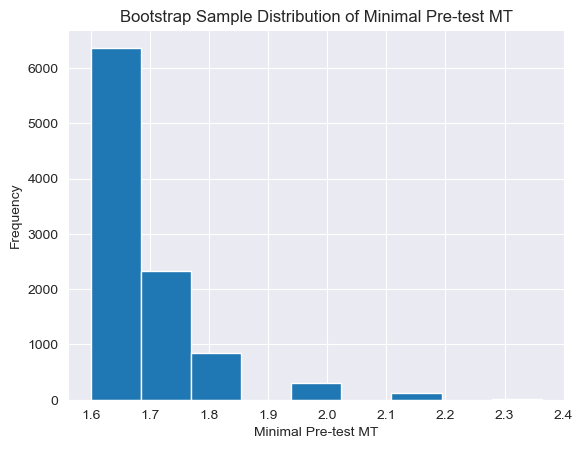

In [14]:
# bootstrap resampling
boot_mins = []
for i in range(n_boot):
    resample = np.random.choice(df.MT_pre, size=n, replace=True)
    boot_min = np.min(resample)
    boot_mins.append(boot_min)

# plot bootstrap sample distribution
import matplotlib.pyplot as plt
plt.hist(boot_mins, bins=9)
plt.title("Bootstrap Sample Distribution of Minimal Pre-test MT")
plt.xlabel("Minimal Pre-test MT")
plt.ylabel("Frequency")
plt.show()


In [15]:
# bootstrap percentile confidence interval
lower = np.percentile(boot_mins, 2.5)
upper = np.percentile(boot_mins, 97.5)
print("Bootstrap 95% CI for Minimal Pre-test MT:", (lower, upper))


Bootstrap 95% CI for Minimal Pre-test MT: (1.6, 1.9762)
